In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import lmdiag

from statsmodels.sandbox.regression.predstd import wls_prediction_std

import warnings
warnings.filterwarnings('ignore')

plt.style.use("seaborn")

## Problem 1. Use “Auto” data set.

### a) Perform a simple linear regression with “mpg” as the response and “horsepower” as the predictor. Print and explain the output.

In [2]:
df = pd.read_csv('Data/Auto.csv', na_values = "?").dropna()
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [3]:
lm = smf.ols('mpg ~ horsepower', df).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 07 May 2020   Prob (F-statistic):           7.03e-81
Time:                        00:09:20   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary table we can conclude that the horsepower explains 60% of "mpg"'s variability and the unit increase of the horsepower results of -0.1578 decrease of mpg.

In [4]:
prediction = lm.predict(df.horsepower.iloc[97:98, ])
actual_value = df.iloc[97:98, 0]

print("The predicted MPG for 98 horsepower is: %0.2f" % prediction)
print("Actual value is: %0.2f" % actual_value)

The predicted MPG for 98 horsepower is: 24.15
Actual value is: 16.00


Above you can see the mpg prediction for horsepower of 98.

In [5]:
lm.conf_int(alpha = 0.05)

,0,1
Intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


Above cell shows the 95% confidence interval of the coefficients.

Let's find also prediction intervals for each value of horsepower.

In [6]:
pred_stdev, lower, upper = wls_prediction_std(lm)

pred_interval = pd.DataFrame(data = list(zip(lower, upper)), columns = ["Lower", "Upper"])
pred_interval.head(10)

,Lower,Upper
0,9.753295,29.078797
1,4.203732,23.579228
2,6.584598,25.933704
3,6.584598,25.933704
4,8.169775,27.505422
5,-1.047190,18.412398
6,-4.557656,14.977695
7,-3.759136,15.757623
8,-5.356577,14.198169
9,0.227396,19.663327


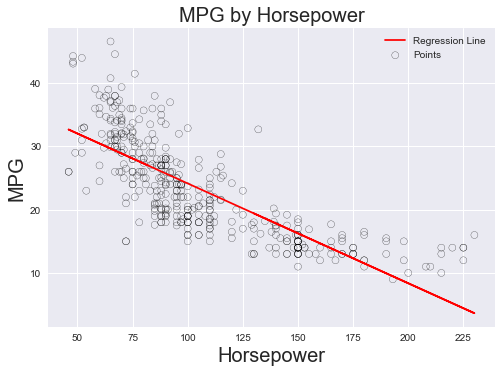

In [7]:
plt.scatter(x = df.horsepower, y = df.mpg, alpha = 0.8, facecolors = "None", edgecolors = "k", label = "Points")
plt.plot(df.horsepower, lm.fittedvalues, color = 'red', label = "Regression Line")
plt.title("MPG by Horsepower", fontsize = 20)
plt.xlabel("Horsepower", fontsize = 20)
plt.ylabel("MPG", fontsize = 20)
plt.legend()
plt.show()

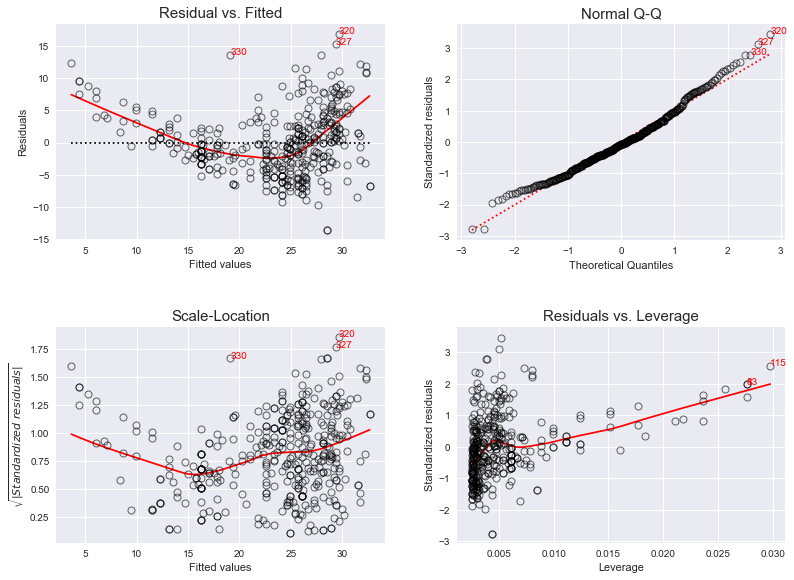

In [8]:
plt.figure(figsize = (11,8))
lmdiag.plot(lm)
plt.show()

Residual vs. Fitted plot shows some pattern between points. Thus, the model does not perform well. We may also see some high leverage points and outliers in the plots.

## Problem 2. Use "Carseats" data set and perform multiple linear regression to predict "Sales" using “Price”, “Urban”, and “US”. Comment on results.

In [9]:
carseats = pd.read_csv('Data/Carseats.csv', index_col = 0)
carseats.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes
7,6.63,115,105,0,45,108,Medium,71,15,Yes,No
8,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
9,6.54,132,110,0,108,124,Medium,76,10,No,No
10,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [10]:
carseats.select_dtypes(include = 'object').columns.values

array(['ShelveLoc', 'Urban', 'US'], dtype=object)

In [11]:
carseats.Urban = carseats.Urban.map({"Yes": 1, "No": 0})
carseats.US = carseats.US.map({"Yes": 1, "No": 0})
carseats.ShelveLoc = carseats.ShelveLoc.map({"Bad": 0, "Medium": 1, "Good": 2})
carseats.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,0,42,17,1,1
2,11.22,111,48,16,260,83,2,65,10,1,1
3,10.06,113,35,10,269,80,1,59,12,1,1
4,7.40,117,100,4,466,97,1,55,14,1,1
5,4.15,141,64,3,340,128,0,38,13,1,0
6,10.81,124,113,13,501,72,0,78,16,0,1
7,6.63,115,105,0,45,108,1,71,15,1,0
8,11.85,136,81,15,425,120,2,67,10,1,1
9,6.54,132,110,0,108,124,1,76,10,0,0
10,4.69,132,113,0,131,124,1,76,17,0,1


In [12]:
sales_mreg = smf.ols(formula = 'Sales ~ Price + Urban + US', data = carseats).fit()
sales_mreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 07 May 2020   Prob (F-statistic):           2.39e-23
Time:                        00:09:22   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the P-Value of the "Urban" feature is 0.936, which is significantly higher than the level of confidence (0.05), we reject the null hypothesis for this feature.

In [13]:
sales_mreg_improved = smf.ols(formula = 'Sales ~ Price + US', data = carseats).fit()
sales_mreg_improved.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 07 May 2020   Prob (F-statistic):           2.66e-24
Time:                        00:09:22   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
sales_mreg_improved.conf_int(alpha = .05)

,0,1
Intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


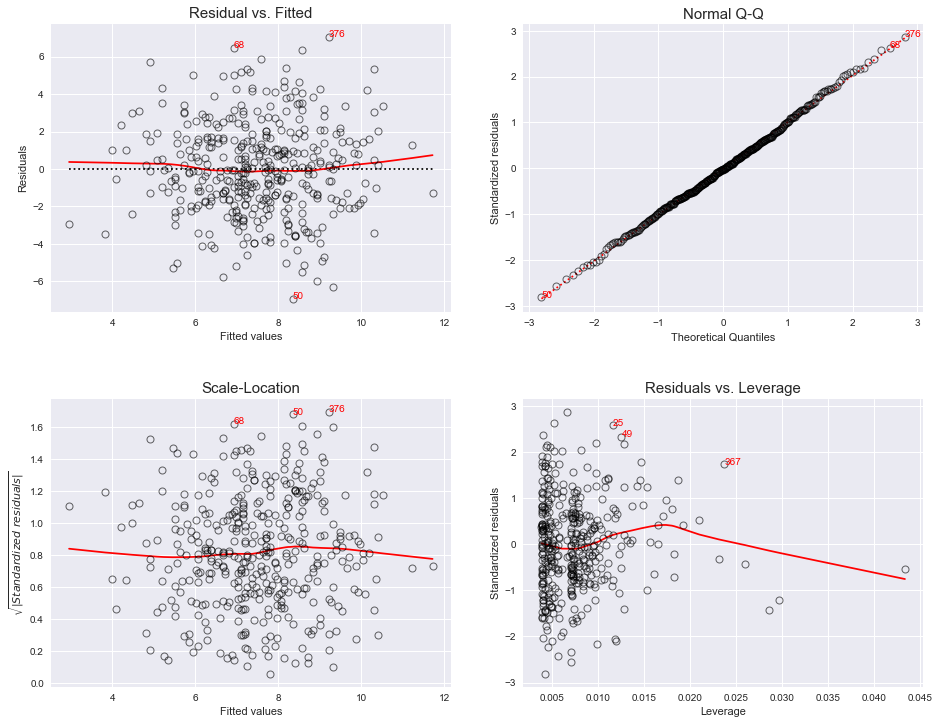

In [15]:
plt.figure(figsize = (13, 10))
lmdiag.plot(sales_mreg_improved)
plt.show()

In [16]:
outliers = carseats.index.isin([68, 50, 376])
num_of_outliers = sum(outliers == True)
num_of_outliers

3

In [17]:
carseats = carseats[~outliers]

In [18]:
carseats.iloc[48:50]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
49,3.91,116,52,0,349,98,0,69,18,1,0
51,1.42,99,32,18,341,108,0,80,16,1,1


## Problem 3. Use "Auto" dataset. Perform multiple linear regression and comment on results.

In [19]:
cars = df
cars.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


''

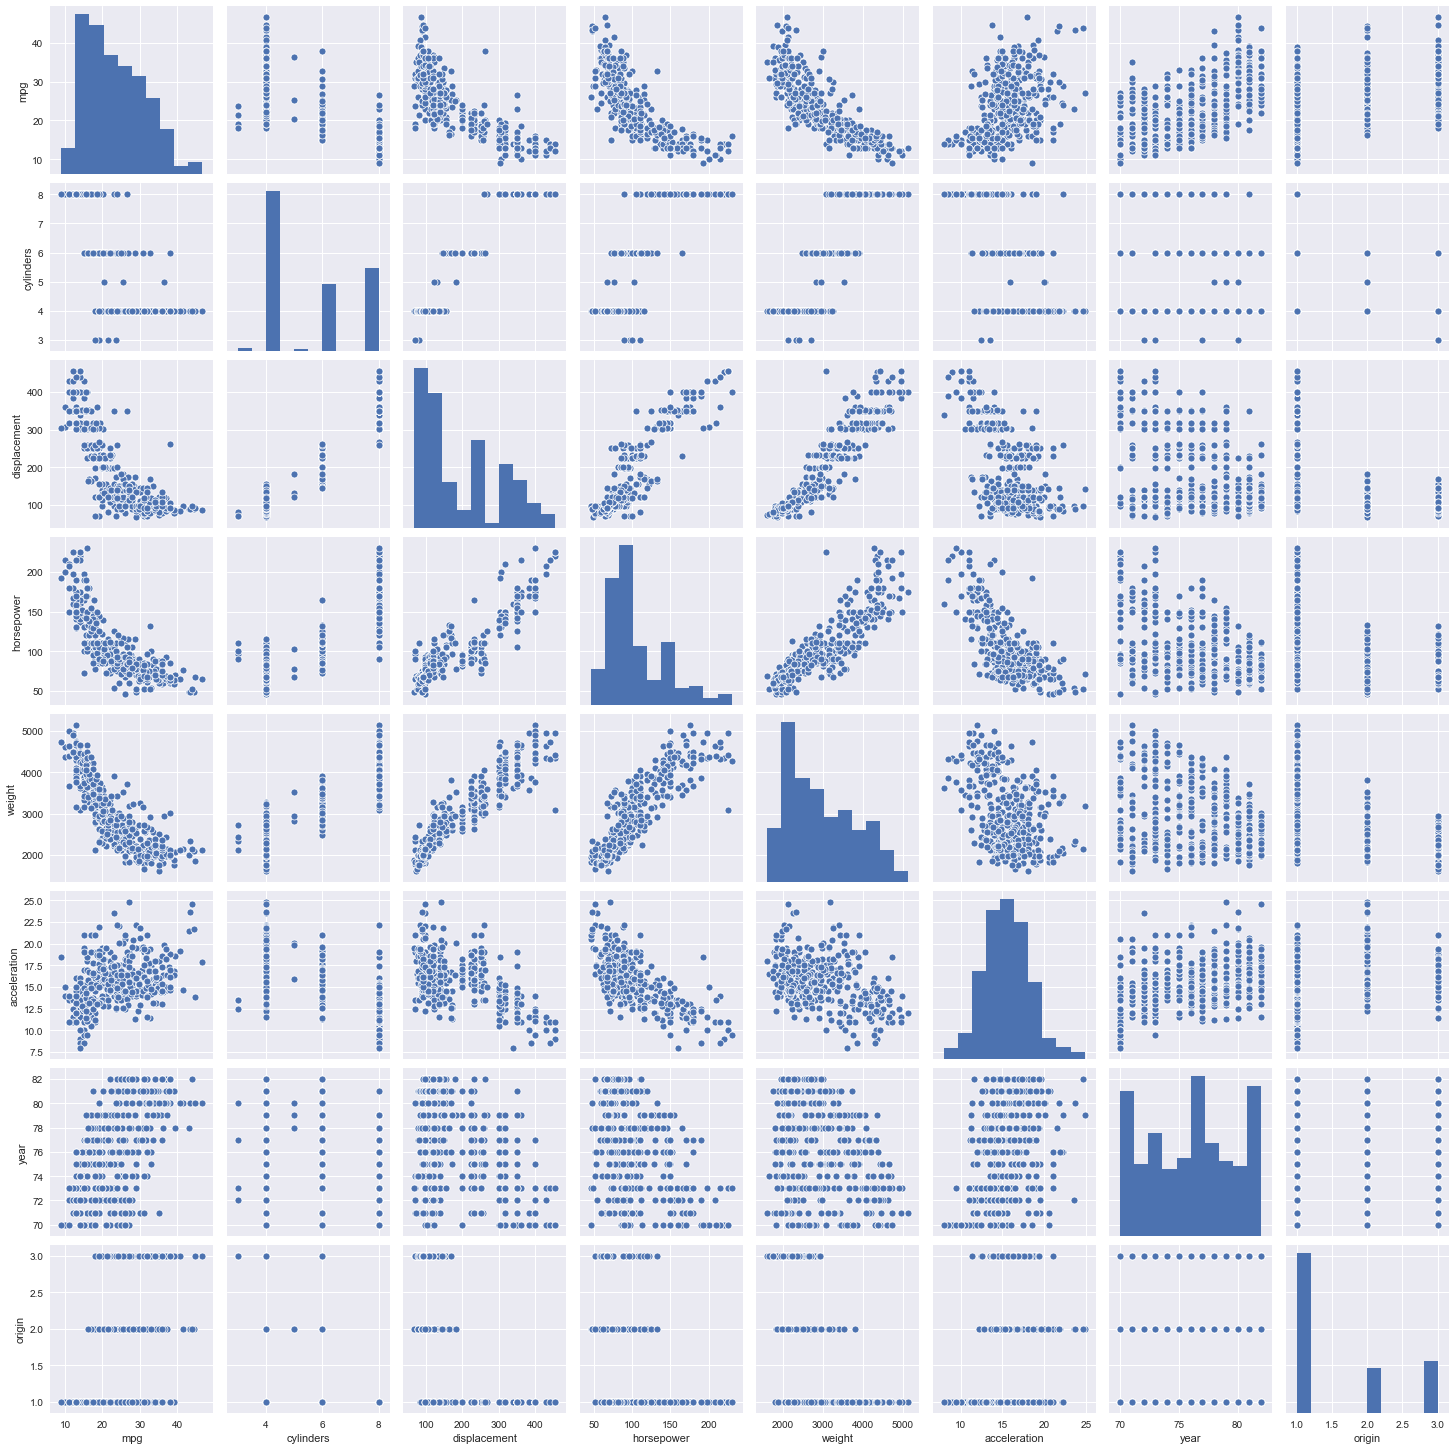

In [20]:
sns.pairplot(cars)
;

In [21]:
cars_corrMatrix = cars.corr()
cars_corrMatrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


''

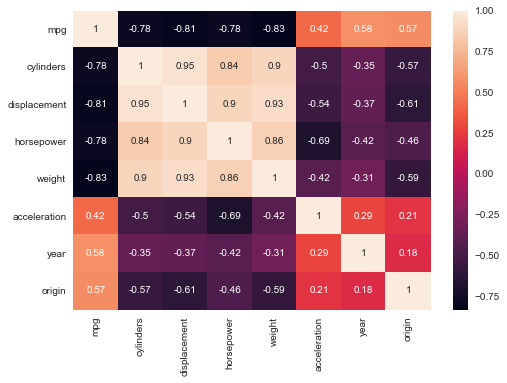

In [22]:
sns.heatmap(cars_corrMatrix, annot = True)
;

In [23]:
mpg_reg_all = smf.ols(formula = 
                "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin",
                data = cars).fit()

mpg_reg_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 07 May 2020   Prob (F-statistic):          2.04e-139
Time:                        00:09:38   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predictors "displacement", "weight", "year" and "origin" have a P-value less than 0.05, which states that these features have statistically significant relationship to the response "mpg". Features "acceleration", "horsepower" and "cylinders" should be removed from the model since they failed to reject the null hyphotesis.

In [24]:
mpg_reg_fixed = smf.ols(formula = "mpg ~ displacement + weight + year + origin", data = cars).fit()
mpg_reg_fixed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     435.1
Date:                Thu, 07 May 2020   Prob (F-statistic):          9.57e-142
Time:                        00:09:38   Log-Likelihood:                -1027.2
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     387   BIC:                             2084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.6065      4.028     -4.620      0.000     -26.526     -10.687
displacement     0.0056      0.005      1.172      0.242      -0.004       0.015
weight          -0.0066      0.001    -11.802      0.000      -0.008      -0.005
year             0.7714      0.050     15.486      0.000       0.673       0.869
origin           1.2262      0.267      4.593      0.000       0.701       1.751
==============================================================================
Omnibus:                       37.960   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.311
Skew:                           0.562   Prob(JB):                     1.20e-16
Kurtosis:                       4.796   Cond. No.                     7.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

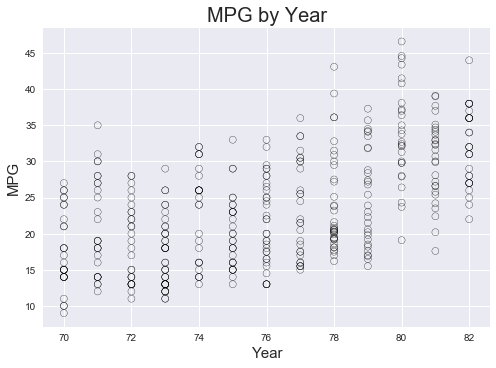

In [25]:
plt.scatter(x = cars.year, y = cars.mpg, facecolors = "None", edgecolors = "k", label = "Points")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("MPG", fontsize = 15)
plt.title("MPG by Year", fontsize = 20)
plt.show()

From the model we can conclude that for every unit increase of the "year", "mpg" will increase by 0.7508 units in average.

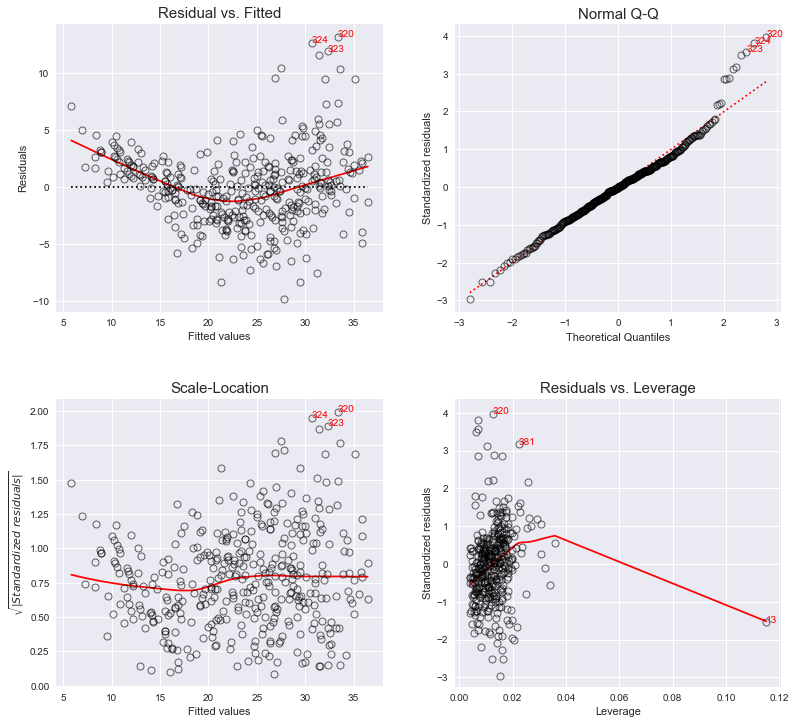

In [26]:
plt.figure(figsize = (11,10))
lmdiag.plot(mpg_reg_fixed)
plt.show()

From above diagnostic plots we can conclude several problems. First, in Residual vs. Fitted plot we can see that points have curved relationship, which indicates that the model is not efficient. In Normal Q-Q plot we can see skewness at the upper part of the line which states that points are not normally distributed. 

We can conclude that model does not work properly and we should use other approaches to explain linear relationship between predictors and response.

From the plots we can see that observations 320, 323, 324 are outliers, but not leverage points since they have low leverage statistic. Furthermore, point 43 is not an outlier but it has a quite big leverage statistic, thus it can be considered as a leverage point.

In [27]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [28]:
cars_log_columns = np.log(cars[[
    'cylinders', "displacement", "horsepower", "weight" , 'acceleration' ,'year' ,"origin"
]])

cars_log_columns

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,2.079442,5.726848,4.867534,8.161660,2.484907,4.248495,0.000000
1,2.079442,5.857933,5.105945,8.214194,2.442347,4.248495,0.000000
2,2.079442,5.762051,5.010635,8.142063,2.397895,4.248495,0.000000
3,2.079442,5.717028,5.010635,8.141190,2.484907,4.248495,0.000000
4,2.079442,5.710427,4.941642,8.145840,2.351375,4.248495,0.000000
...,...,...,...,...,...,...,...
392,1.386294,4.941642,4.454347,7.933797,2.747271,4.406719,0.000000
393,1.386294,4.574711,3.951244,7.663877,3.202746,4.406719,0.693147
394,1.386294,4.905275,4.430817,7.738488,2.451005,4.406719,0.000000
395,1.386294,4.787492,4.369448,7.872836,2.923162,4.406719,0.000000


In [29]:
cars_log_data = pd.concat([cars.mpg, cars_log_columns], axis = 1, sort = False)
cars_log_data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,2.079442,5.726848,4.867534,8.161660,2.484907,4.248495,0.0
1,15.0,2.079442,5.857933,5.105945,8.214194,2.442347,4.248495,0.0
2,18.0,2.079442,5.762051,5.010635,8.142063,2.397895,4.248495,0.0
3,16.0,2.079442,5.717028,5.010635,8.141190,2.484907,4.248495,0.0
4,17.0,2.079442,5.710427,4.941642,8.145840,2.351375,4.248495,0.0
5,15.0,2.079442,6.061457,5.288267,8.375860,2.302585,4.248495,0.0
6,14.0,2.079442,6.118097,5.393628,8.378850,2.197225,4.248495,0.0
7,14.0,2.079442,6.086775,5.370638,8.369157,2.140066,4.248495,0.0
8,14.0,2.079442,6.120297,5.416100,8.395026,2.302585,4.248495,0.0
9,15.0,2.079442,5.966147,5.247024,8.255828,2.140066,4.248495,0.0


In [30]:
cars_log_data_reg = smf.ols(
    formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', 
    data = cars_log_data
).fit()

cars_log_data_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Thu, 07 May 2020   Prob (F-statistic):          6.67e-153
Time:                        00:09:41   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -66.5643     17.505     -3.803      0.000    -100.982     -32.146
cylinders        1.4818      1.659      0.893      0.372      -1.780       4.743
displacement    -1.0551      1.538     -0.686      0.493      -4.080       1.970
horsepower      -6.9657      1.557     -4.474      0.000     -10.027      -3.905
weight         -12.5728      2.225     -5.650      0.000     -16.948      -8.198
acceleration    -4.9831      1.608     -3.099      0.002      -8.144      -1.822
year            54.9857      3.555     15.465      0.000      47.995      61.976
origin           1.5822      0.508      3.113      0.002       0.583       2.582
==============================================================================
Omnibus:                       40.670   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.138
Skew:                           0.587   Prob(JB):                     2.40e-18
Kurtosis:                       4.894   Cond. No.                     1.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

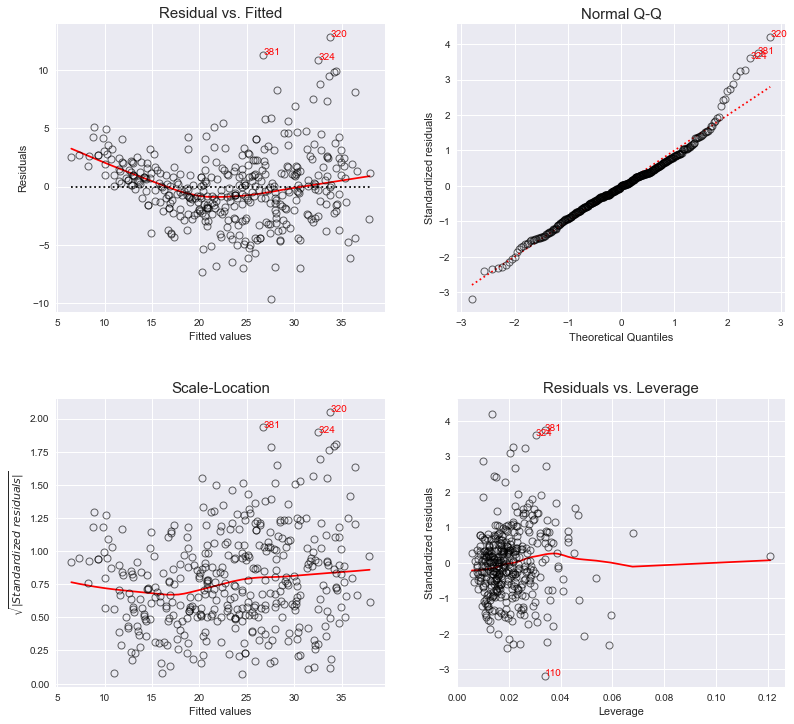

In [31]:
plt.figure(figsize = (11, 10))
lmdiag.plot(cars_log_data_reg)
plt.show()

In [32]:
cars_sqrt_columns = np.sqrt(cars[[
    'cylinders', "displacement", "horsepower", "weight" , 'acceleration' ,'year' ,"origin"
]])

cars_sqrt_columns

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,2.828427,17.521415,11.401754,59.194594,3.464102,8.366600,1.000000
1,2.828427,18.708287,12.845233,60.770058,3.391165,8.366600,1.000000
2,2.828427,17.832555,12.247449,58.617404,3.316625,8.366600,1.000000
3,2.828427,17.435596,12.247449,58.591808,3.464102,8.366600,1.000000
4,2.828427,17.378147,11.832160,58.728187,3.240370,8.366600,1.000000
...,...,...,...,...,...,...,...
392,2.000000,11.832160,9.273618,52.820451,3.949684,9.055385,1.000000
393,2.000000,9.848858,7.211103,46.151923,4.959839,9.055385,1.414214
394,2.000000,11.618950,9.165151,47.906158,3.405877,9.055385,1.000000
395,2.000000,10.954451,8.888194,51.234754,4.312772,9.055385,1.000000


In [33]:
cars_sqrt_data = pd.concat([cars.mpg, cars_sqrt_columns], axis = 1, sort = False)
cars_sqrt_data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,2.828427,17.521415,11.401754,59.194594,3.464102,8.3666,1.0
1,15.0,2.828427,18.708287,12.845233,60.770058,3.391165,8.3666,1.0
2,18.0,2.828427,17.832555,12.247449,58.617404,3.316625,8.3666,1.0
3,16.0,2.828427,17.435596,12.247449,58.591808,3.464102,8.3666,1.0
4,17.0,2.828427,17.378147,11.832160,58.728187,3.240370,8.3666,1.0
5,15.0,2.828427,20.712315,14.071247,65.886266,3.162278,8.3666,1.0
6,14.0,2.828427,21.307276,14.832397,65.984847,3.000000,8.3666,1.0
7,14.0,2.828427,20.976177,14.662878,65.665821,2.915476,8.3666,1.0
8,14.0,2.828427,21.330729,15.000000,66.520673,3.162278,8.3666,1.0
9,15.0,2.828427,19.748418,13.784049,62.048368,2.915476,8.3666,1.0


In [34]:
cars_sqrt_data_reg = smf.ols(
    formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin',
    data = cars_sqrt_data
).fit()

cars_sqrt_data_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     275.3
Date:                Thu, 07 May 2020   Prob (F-statistic):          2.17e-145
Time:                        00:09:43   Log-Likelihood:                -1009.4
No. Observations:                 392   AIC:                             2035.
Df Residuals:                     384   BIC:                             2067.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -49.7981      9.178     -5.426      0.000     -67.844     -31.752
cylinders       -0.2370      1.538     -0.154      0.878      -3.260       2.786
displacement     0.2258      0.229      0.984      0.326      -0.225       0.677
horsepower      -0.7798      0.308     -2.533      0.012      -1.385      -0.174
weight          -0.6217      0.079     -7.872      0.000      -0.777      -0.466
acceleration    -0.8253      0.834     -0.989      0.323      -2.466       0.815
year            12.7903      0.859     14.891      0.000      11.102      14.479
origin           3.2604      0.768      4.247      0.000       1.751       4.770
==============================================================================
Omnibus:                       40.498   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.517
Skew:                           0.608   Prob(JB):                     4.00e-17
Kurtosis:                       4.773   Cond. No.                     3.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

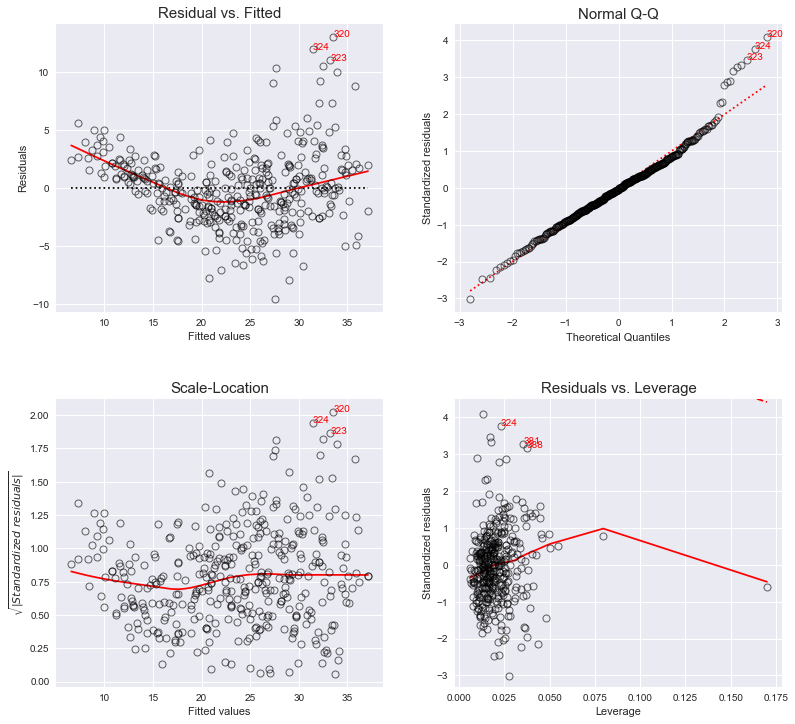

In [35]:
plt.figure(figsize = (11, 10))
lmdiag.plot(cars_sqrt_data_reg)
plt.show()

In [36]:
cars_square_columns = np.square(cars[[
    'cylinders', "displacement", "horsepower", "weight" , 'acceleration' ,'year' ,"origin"
]])

cars_square_data = pd.concat([cars.mpg, cars_square_columns], axis = 1, sort = False)
cars_square_data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,64.0,94249.0,16900.0,12278016.0,144.00,4900.0,1.0
1,15.0,64.0,122500.0,27225.0,13638249.0,132.25,4900.0,1.0
2,18.0,64.0,101124.0,22500.0,11806096.0,121.00,4900.0,1.0
3,16.0,64.0,92416.0,22500.0,11785489.0,144.00,4900.0,1.0
4,17.0,64.0,91204.0,19600.0,11895601.0,110.25,4900.0,1.0
5,15.0,64.0,184041.0,39204.0,18844281.0,100.00,4900.0,1.0
6,14.0,64.0,206116.0,48400.0,18957316.0,81.00,4900.0,1.0
7,14.0,64.0,193600.0,46225.0,18593344.0,72.25,4900.0,1.0
8,14.0,64.0,207025.0,50625.0,19580625.0,100.00,4900.0,1.0
9,15.0,64.0,152100.0,36100.0,14822500.0,72.25,4900.0,1.0


In [37]:
cars_square_data_reg = smf.ols(
    formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin',
    data = cars_square_data
).fit()

cars_square_data_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     216.8
Date:                Thu, 07 May 2020   Prob (F-statistic):          3.57e-129
Time:                        00:09:46   Log-Likelihood:                -1047.6
No. Observations:                 392   AIC:                             2111.
Df Residuals:                     384   BIC:                             2143.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2080      2.356      0.513      0.608      -3.424       5.840
cylinders       -0.0883      0.025     -3.502      0.001      -0.138      -0.039
displacement   5.68e-05   1.38e-05      4.109      0.000    2.96e-05     8.4e-05
horsepower   -3.621e-05   4.98e-05     -0.728      0.467      -0.000    6.16e-05
weight       -9.351e-07   8.98e-08    -10.416      0.000   -1.11e-06   -7.59e-07
acceleration     0.0063      0.003      2.334      0.020       0.001       0.012
year             0.0050      0.000     14.160      0.000       0.004       0.006
origin           0.4129      0.069      5.971      0.000       0.277       0.549
==============================================================================
Omnibus:                       21.204   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.337
Skew:                           0.431   Prob(JB):                     4.26e-07
Kurtosis:                       4.027   Cond. No.                     1.45e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

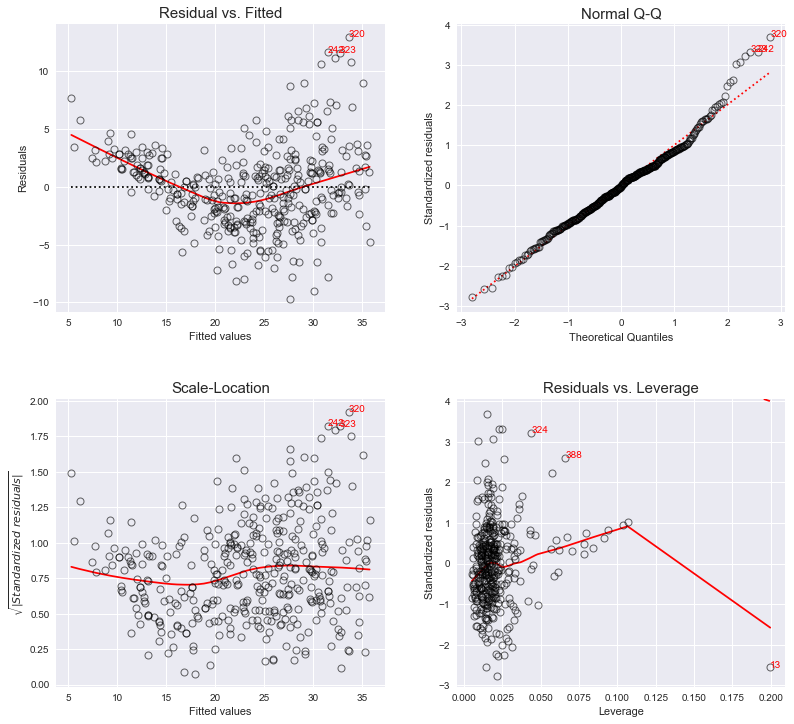

In [38]:
plt.figure(figsize = (11, 10))
lmdiag.plot(cars_square_data_reg)
plt.show()

Analyzing the diagnostic plots of different transformations, we can conclude that log transformation is working the best, since it has a more linear representation of residuals vs. fitted values.